# Questão 01

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01, epochs=1000):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_function(summation)

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

def generate_inputs_labels(num_inputs, logic_gate):
    inputs = np.random.randint(2, size=(2**num_inputs, num_inputs))
    if logic_gate == "and":
        labels = np.all(inputs, axis=1)
    elif logic_gate == "or":
        labels = np.any(inputs, axis=1)
    else:
        raise ValueError("A porta lógica deve ser 'and' ou 'or'")
    return inputs, labels.astype(int)

def test_perceptron(num_inputs, logic_gate):
    inputs, labels = generate_inputs_labels(num_inputs, logic_gate)
    perceptron = Perceptron(num_inputs)

    print(f"\nTreinando o Perceptron para o problema de {logic_gate.upper()} com {num_inputs} entradas:")
    print("Pesos iniciais:", perceptron.weights)
    print("Bias inicial:", perceptron.bias)

    perceptron.train(inputs, labels)

    print("\nPesos treinados:", perceptron.weights)
    print("Bias treinado:", perceptron.bias)

    print("\nTestando o Perceptron treinado:")
    for i, input_set in enumerate(inputs):
        prediction = perceptron.predict(input_set)
        print(f"Entrada: {input_set}, Previsto: {prediction}, Real: {labels[i]}")

num_inputs = int(input("Digite o número de entradas para o Perceptron (por exemplo, 2, 3, ...): "))
logic_gate = input("Digite a porta lógica desejada ('and' ou 'or'): ").lower()

test_perceptron(num_inputs, logic_gate)

Digite o número de entradas para o Perceptron (por exemplo, 2, 3, ...): 2
Digite a porta lógica desejada ('and' ou 'or'): and

Treinando o Perceptron para o problema de AND com 2 entradas:
Pesos iniciais: [0.05961426 0.87950533]
Bias inicial: 0.11748656128237867

Pesos treinados: [0.00961426 0.87950533]
Bias treinado: -0.01251343871762132

Testando o Perceptron treinado:
Entrada: [0 0], Previsto: 0, Real: 0
Entrada: [0 0], Previsto: 0, Real: 0
Entrada: [1 1], Previsto: 1, Real: 1
Entrada: [1 0], Previsto: 0, Real: 0


Abaixo, pode-se opbservar que, pesar do treinamento, o Perceptron não será capaz de resolver corretamente o problema XOR. Isso ocorre porque **o XOR não é linearmente separável**, e **o Perceptron é um classificador linear**, incapaz de encontrar uma linha (ou hiperplano) que separe as classes 0 e 1 de forma adequada.

In [ ]:
def test_xor():
    xor_inputs_2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    xor_labels_2 = np.array([0, 1, 1, 0])

    perceptron_xor = Perceptron(2)

    print("\nTreinando o Perceptron para o problema XOR com 2 entradas:")
    print("Pesos iniciais:", perceptron_xor.weights)
    print("Bias inicial:", perceptron_xor.bias)

    perceptron_xor.train(xor_inputs_2, xor_labels_2)

    print("\nPesos treinados:", perceptron_xor.weights)
    print("Bias treinado:", perceptron_xor.bias)

    print("\nTestando o Perceptron treinado para XOR:")
    for i, input_set in enumerate(xor_inputs_2):
        prediction = perceptron_xor.predict(input_set)
        print(f"Entrada: {input_set}, Previsto: {prediction}, Real: {xor_labels_2[i]}")

# Testar o Perceptron para o problema XOR
test_xor()


Treinando o Perceptron para o problema XOR com 2 entradas:
Pesos iniciais: [0.99039722 0.66627817]
Bias inicial: 0.2618841091451878

Pesos treinados: [-0.00960278  0.00627817]
Bias treinado: 0.0018841091451876936

Testando o Perceptron treinado para XOR:
Entrada: [0 0], Previsto: 1, Real: 0
Entrada: [0 1], Previsto: 1, Real: 1
Entrada: [1 0], Previsto: 0, Real: 1
Entrada: [1 1], Previsto: 0, Real: 0


# Questões 02 - 04

2.   Letra d
3.   Letra c
4.   Letra c

# Código original

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neural_network import MLPClassifier

import pickle

local_file_path = 'cancer.pkl'

with open(local_file_path, 'rb') as f:
    X_treino, X_teste, y_treino, y_teste = pickle.load(f)

modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_treino, y_treino)

rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(X_treino, y_treino)

previsoes = modelo.predict(X_teste)

previsoes
y_teste

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

print(classification_report(y_teste, previsoes))

# Questão 05

## 5.1

Iteration 1, loss = 0.69037194
Iteration 2, loss = 0.67828897
Iteration 3, loss = 0.66885711
Iteration 4, loss = 0.65966414
Iteration 5, loss = 0.65078216
Iteration 6, loss = 0.64282176
Iteration 7, loss = 0.63535246
Iteration 8, loss = 0.62820975
Iteration 9, loss = 0.62183970
Iteration 10, loss = 0.61528908
Iteration 11, loss = 0.60963290
Iteration 12, loss = 0.60391435
Iteration 13, loss = 0.59915665
Iteration 14, loss = 0.59392567
Iteration 15, loss = 0.58938181
Iteration 16, loss = 0.58451881
Iteration 17, loss = 0.58065273
Iteration 18, loss = 0.57655800
Iteration 19, loss = 0.57261148
Iteration 20, loss = 0.56867253
Iteration 21, loss = 0.56515331
Iteration 22, loss = 0.56154365
Iteration 23, loss = 0.55834388
Iteration 24, loss = 0.55479548
Iteration 25, loss = 0.55158476
Iteration 26, loss = 0.54845738
Iteration 27, loss = 0.54549209
Iteration 28, loss = 0.54236115
Iteration 29, loss = 0.53930850
Iteration 30, loss = 0.53635489
Iteration 31, loss = 0.53325701
Iteration 32, los

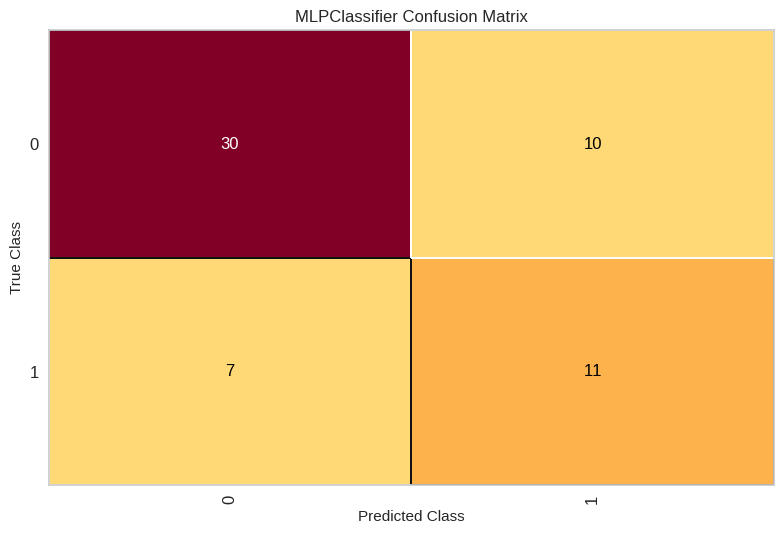

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        40
           1       0.52      0.61      0.56        18

    accuracy                           0.71        58
   macro avg       0.67      0.68      0.67        58
weighted avg       0.72      0.71      0.71        58



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

# Carregar o arquivo CSV
df = pd.read_csv('/content/breast-cancer.csv')

# Separar os dados em features (X) e rótulos (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertendo colunas categóricas para numéricas usando LabelEncoder
le = LabelEncoder()

# Ajustar o LabelEncoder apenas nos dados de treino
y_treino_encoded = le.fit_transform(y_treino)

# Aplicar a transformação nos dados de teste
y_teste_encoded = le.transform(y_teste)

# Lidar com variáveis categóricas usando OneHotEncoder
categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

# Juntar os dados de treino e teste antes de aplicar o OneHotEncoder
X_combined = pd.concat([X_treino, X_teste], axis=0)
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_cols)

# Separar os dados de volta em treino e teste
X_treino_encoded = X_combined_encoded.iloc[:len(X_treino)]
X_teste_encoded = X_combined_encoded.iloc[len(X_treino):]

# Normalização
scaler = MinMaxScaler()
X_treino_normalized = scaler.fit_transform(X_treino_encoded)
X_teste_normalized = scaler.transform(X_teste_encoded)

# Balanceamento
smote = SMOTE()
X_treino_balanced, y_treino_balanced = smote.fit_resample(X_treino_normalized, y_treino_encoded)

# Restante do seu código (modelo, treinamento, previsões, métricas) permanece o mesmo
modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_treino_balanced, y_treino_balanced)

previsoes = modelo.predict(X_teste_normalized)

print("Accuracy Score:", accuracy_score(y_teste_encoded, previsoes))

# Confusion Matrix
confusion_matrix_plot = ConfusionMatrix(modelo)
confusion_matrix_plot.fit(X_treino_balanced, y_treino_balanced)
confusion_matrix_plot.score(X_teste_normalized, y_teste_encoded)
confusion_matrix_plot.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_teste_encoded, previsoes))


## 5.2

Iteration 1, loss = 0.69387780
Iteration 2, loss = 0.67714516
Iteration 3, loss = 0.66241069
Iteration 4, loss = 0.64978166
Iteration 5, loss = 0.63708120
Iteration 6, loss = 0.62640047
Iteration 7, loss = 0.61502998
Iteration 8, loss = 0.60419668
Iteration 9, loss = 0.59298161
Iteration 10, loss = 0.58235378
Iteration 11, loss = 0.57275322
Iteration 12, loss = 0.56322757
Iteration 13, loss = 0.55465721
Iteration 14, loss = 0.54531940
Iteration 15, loss = 0.53687000
Iteration 16, loss = 0.52786933
Iteration 17, loss = 0.51979128
Iteration 18, loss = 0.51108385
Iteration 19, loss = 0.50265781
Iteration 20, loss = 0.49445978
Iteration 21, loss = 0.48548767
Iteration 22, loss = 0.47648432
Iteration 23, loss = 0.46843849
Iteration 24, loss = 0.45921950
Iteration 25, loss = 0.45008435
Iteration 26, loss = 0.44044533
Iteration 27, loss = 0.43143582
Iteration 28, loss = 0.42170170
Iteration 29, loss = 0.41232718
Iteration 30, loss = 0.40269250
Iteration 31, loss = 0.39345554
Iteration 32, los

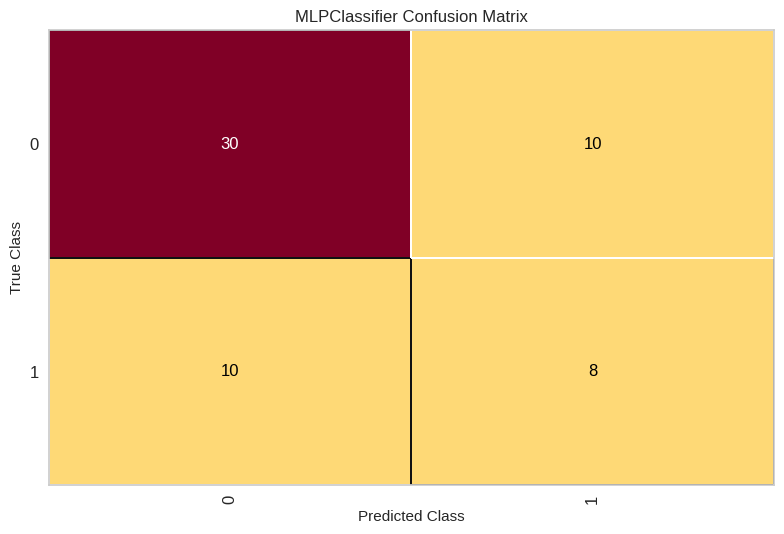

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.44      0.44      0.44        18

    accuracy                           0.66        58
   macro avg       0.60      0.60      0.60        58
weighted avg       0.66      0.66      0.66        58



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

df = pd.read_csv('/content/breast-cancer.csv')

X = df.drop('Class', axis=1)
y = df['Class']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()

y_treino_encoded = le.fit_transform(y_treino)

y_teste_encoded = le.transform(y_teste)

categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

X_combined = pd.concat([X_treino, X_teste], axis=0)
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_cols)

X_treino_encoded = X_combined_encoded.iloc[:len(X_treino)]
X_teste_encoded = X_combined_encoded.iloc[len(X_treino):]

scaler = MinMaxScaler()
X_treino_normalized = scaler.fit_transform(X_treino_encoded)
X_teste_normalized = scaler.transform(X_teste_encoded)

smote = SMOTE()
X_treino_balanced, y_treino_balanced = smote.fit_resample(X_treino_normalized, y_treino_encoded)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
}

modelo = MLPClassifier(max_iter=1000, verbose=True)
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_treino_balanced, y_treino_balanced)

best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

modelo = MLPClassifier(max_iter=1000, verbose=True, **best_params)
modelo.fit(X_treino_balanced, y_treino_balanced)

previsoes = modelo.predict(X_teste_normalized)

print("Accuracy Score:", accuracy_score(y_teste_encoded, previsoes))

confusion_matrix_plot = ConfusionMatrix(modelo)
confusion_matrix_plot.fit(X_treino_balanced, y_treino_balanced)
confusion_matrix_plot.score(X_teste_normalized, y_teste_encoded)
confusion_matrix_plot.show()

print("Classification Report:")
print(classification_report(y_teste_encoded, previsoes))

## 5.3

Neste exemplo, utiliza-se a lista 'learning_rates' para iterar sobre diferentes taxas de aprendizado. O número de épocas necessário para convergência é então armazenado na lista 'epochs_needed'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

df = pd.read_csv('/content/breast-cancer.csv')

X = df.drop('Class', axis=1)
y = df['Class']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()

y_treino_encoded = le.fit_transform(y_treino)

y_teste_encoded = le.transform(y_teste)

categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

X_combined = pd.concat([X_treino, X_teste], axis=0)
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_cols)

X_treino_encoded = X_combined_encoded.iloc[:len(X_treino)]
X_teste_encoded = X_combined_encoded.iloc[len(X_treino):]

scaler = MinMaxScaler()
X_treino_normalized = scaler.fit_transform(X_treino_encoded)
X_teste_normalized = scaler.transform(X_teste_encoded)

smote = SMOTE()
X_treino_balanced, y_treino_balanced = smote.fit_resample(X_treino_normalized, y_treino_encoded)

# Avaliar a relação entre taxa de aprendizado e épocas
learning_rates = [0.001, 0.01, 0.1, 0.5]
epochs_needed = []

for learning_rate in learning_rates:
    modelo = MLPClassifier(max_iter=1000, learning_rate_init=learning_rate, verbose=True)
    modelo.fit(X_treino_balanced, y_treino_balanced)
    epochs_needed.append(modelo.n_iter_)

for lr, epochs in zip(learning_rates, epochs_needed):
    print(f'Taxa de Aprendizado: {lr}, Épocas Necessárias: {epochs}')

# Restante do seu código permanece o mesmo

Iteration 1, loss = 0.74399191
Iteration 2, loss = 0.72979254
Iteration 3, loss = 0.71832840
Iteration 4, loss = 0.70620107
Iteration 5, loss = 0.69596566
Iteration 6, loss = 0.68708216
Iteration 7, loss = 0.67802397
Iteration 8, loss = 0.67003556
Iteration 9, loss = 0.66296635
Iteration 10, loss = 0.65548601
Iteration 11, loss = 0.64915093
Iteration 12, loss = 0.64288706
Iteration 13, loss = 0.63634650
Iteration 14, loss = 0.63081074
Iteration 15, loss = 0.62548148
Iteration 16, loss = 0.61986268
Iteration 17, loss = 0.61518010
Iteration 18, loss = 0.61052383
Iteration 19, loss = 0.60587878
Iteration 20, loss = 0.60133429
Iteration 21, loss = 0.59711322
Iteration 22, loss = 0.59333302
Iteration 23, loss = 0.58914041
Iteration 24, loss = 0.58523620
Iteration 25, loss = 0.58165900
Iteration 26, loss = 0.57799876
Iteration 27, loss = 0.57469161
Iteration 28, loss = 0.57113203
Iteration 29, loss = 0.56765859
Iteration 30, loss = 0.56426752
Iteration 31, loss = 0.56117911
Iteration 32, los

## 5.4

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'batch_size': [16, 32, 64],
    'max_iter': [500, 1000, 1500]
}

modelo = MLPClassifier()

grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_treino_balanced, y_treino_balanced)

best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

# Restante do código permanece o mesmo, usando os melhores hiperparâmetros

modelo_otimizado = MLPClassifier(**best_params)
modelo_otimizado.fit(X_treino_balanced, y_treino_balanced)

previsoes_otimizadas = modelo_otimizado.predict(X_teste_normalized)

print("Accuracy Score (Modelo Otimizado):", accuracy_score(y_teste_encoded, previsoes_otimizadas))

## 5.5
Utilizando GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'batch_size': [16, 32, 64],
    'max_iter': [500, 1000, 1500]
}

modelo = MLPClassifier()

# Realizar a busca de hiperparâmetros com Grid Search
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_treino_balanced, y_treino_balanced)

best_params = grid_search.best_params_
print("Melhores Hiperparâmetros (Grid Search):", best_params)

# Restante do código permanece o mesmo, usando os melhores hiperparâmetros encontrados

modelo_otimizado_grid = MLPClassifier(**best_params)
modelo_otimizado_grid.fit(X_treino_balanced, y_treino_balanced)

previsoes_otimizadas_grid = modelo_otimizado_grid.predict(X_teste_normalized)

print("Accuracy Score (Modelo Otimizado - Grid Search):", accuracy_score(y_teste_encoded, previsoes_otimizadas_grid))

# Questão 06

Os artigo aborda extensivamente o desafio da explicação de modelos de caixa preta, fornecendo uma variedade de abordagens para compreender e interpretar as decisões desses modelos complexos. Em primeiro lugar, destaca-se a busca por soluções que utilizam as entranhas de modelos como florestas aleatórias, propondo recomendações para transformar exemplos negativos em positivos, revelando a importância das características do modelo nesse processo.

Além disso, os métodos de explicação enfocam a resolução do problema da explicação de resultados de caixas pretas, com ênfase em modelos de aprendizado profundo (DNNs). Abordagens agnósticas são introduzidas, como o Local Interpretable Model-agnostic Explanations (LIME), proporcionando explicações compreensíveis independentemente do tipo de dado ou caixa preta em questão.

Na tentativa de entender o funcionamento interno dos modelos de caixa preta, os textos exploram métodos de inspeção que vão desde a análise de sensibilidade até a visualização de dependências parciais. Soluções específicas para DNNs são discutidas, como Máscaras de Saliência e abordagens baseadas em árvores de decisão. Em paralelo, há uma investigação sobre as possíveis armadilhas dos artefatos, garantindo que as explicações geradas sejam representativas de perturbações naturais e evitem resultados inesperados.

No contexto do projeto de caixas transparentes, as estratégias incluem a extração de regras, seleção de protótipos e outras abordagens. Métodos como Bayesian Case Model (BCM) e seleção de protótipos transparentes buscam equilibrar interpretabilidade e precisão. Em suma, o artigo oferece uma visão abrangente e aprofundada das diversas técnicas empregadas para desvendar o mistério por trás dos modelos de caixa preta, proporcionando insights valiosos para tornar esses modelos mais compreensíveis e confiáveis.

# Questão 07

O documentário "Coded Bias" é um documentário que explora as implicações éticas e sociais dos algoritmos de aprendizado de máquina e inteligência artificial, com foco particular na questão da discriminação algorítmica e vieses presentes nos sistemas automatizados.

O documentário destaca o fenômeno conhecido como "viés algorítmico", que ocorre quando algoritmos de IA aprendem a partir de dados históricos que refletem preconceitos e discriminações sociais. Ele aborda questões de justiça social e destaca como certos grupos podem ser prejudicados por decisões automatizadas, como no caso de sistemas de reconhecimento facial que têm demonstrado viés racial.

A relação com o termo "black box" (caixa preta) e ao artigo do Canvas, está relacionada à opacidade desses algoritmos. Muitos modelos de aprendizado de máquina são complexos e difíceis de interpretar, tornando-se verdadeiras "caixas pretas" onde é desafiador entender como chegam a determinadas decisões ou previsões. Isso gera preocupações sobre a falta de transparência e a dificuldade em responsabilizar sistemas automatizados por resultados injustos ou discriminatórios.

O documentário "Coded Bias" destaca como a falta de compreensão desses modelos pode resultar em impactos negativos na sociedade, especialmente em comunidades historicamente marginalizadas. Ele levanta questões críticas sobre a necessidade de regulamentações, ética e responsabilidade na implementação de algoritmos de IA. Recomendo assistir ao documentário para obter uma compreensão mais aprofundada dessas questões e como elas se relacionam com o conceito de "black box".